Task1
API INTEGRATION AND DATA VISUALIZATION

In [1]:
pip install requests pandas matplotlib seaborn


In [2]:
import requests
import pandas as pd

# Replace with your OpenWeatherMap API key
API_KEY = '63e64d9566db363a2392a5f8fe453b3d'
CITY = 'Chennai'
URL = f'http://api.openweathermap.org/data/2.5/weather?q={CITY}&appid={API_KEY}&units=metric'

response = requests.get(URL)
data = response.json()

if response.status_code == 200:
    weather_data = {
        'City': CITY,
        'Temperature (°C)': data['main']['temp'],
        'Humidity (%)': data['main']['humidity'],
        'Pressure (hPa)': data['main']['pressure'],
        'Weather': data['weather'][0]['description']
    }
    df = pd.DataFrame([weather_data])
    print(df)
else:
    print(f"Error: {data.get('message', 'Unable to fetch data')}")


      City  Temperature (°C)  Humidity (%)  Pressure (hPa)           Weather
0  Chennai             33.75            66            1003  scattered clouds


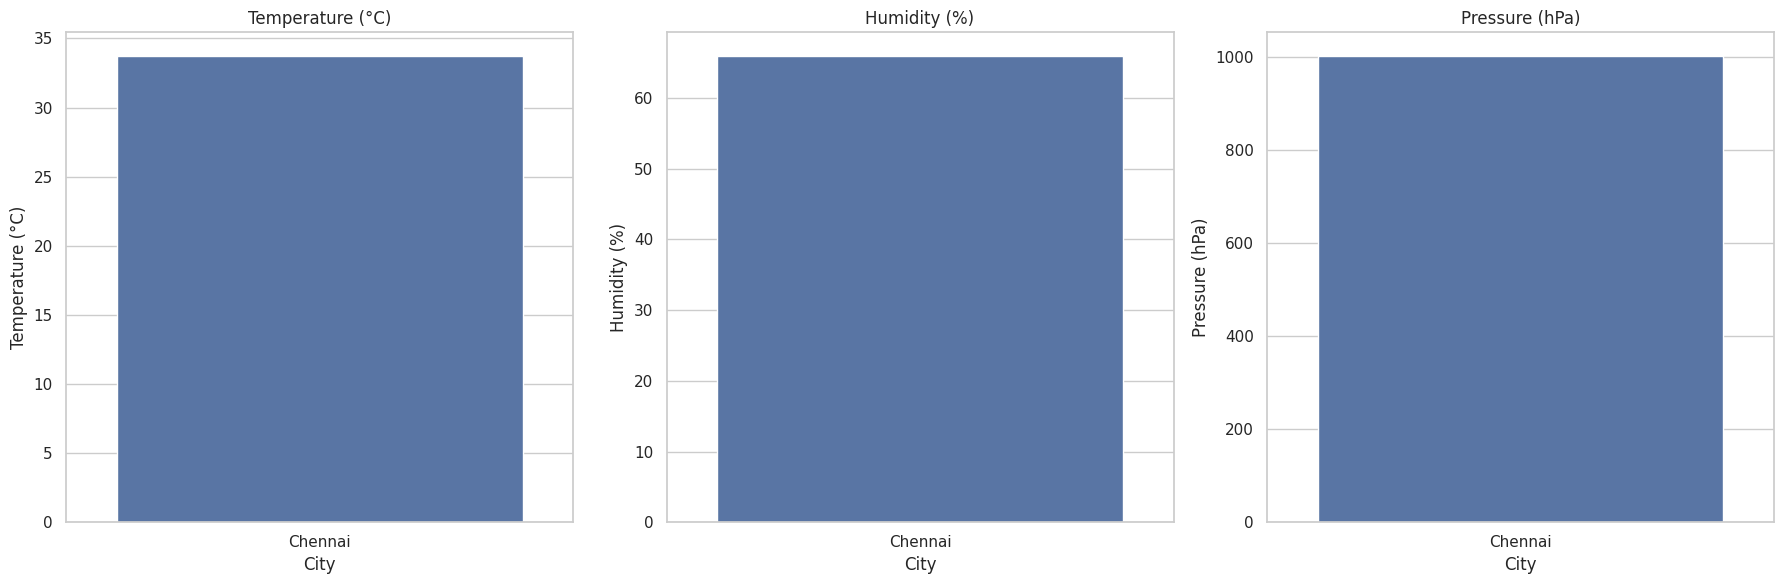

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is the DataFrame from the previous script

# Set the style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Temperature Plot
sns.barplot(x=df['City'], y=df['Temperature (°C)'], ax=axes[0])
axes[0].set_title('Temperature (°C)')

# Humidity Plot
sns.barplot(x=df['City'], y=df['Humidity (%)'], ax=axes[1])
axes[1].set_title('Humidity (%)')

# Pressure Plot
sns.barplot(x=df['City'], y=df['Pressure (hPa)'], ax=axes[2])
axes[2].set_title('Pressure (hPa)')

plt.tight_layout()
plt.show()
